Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB



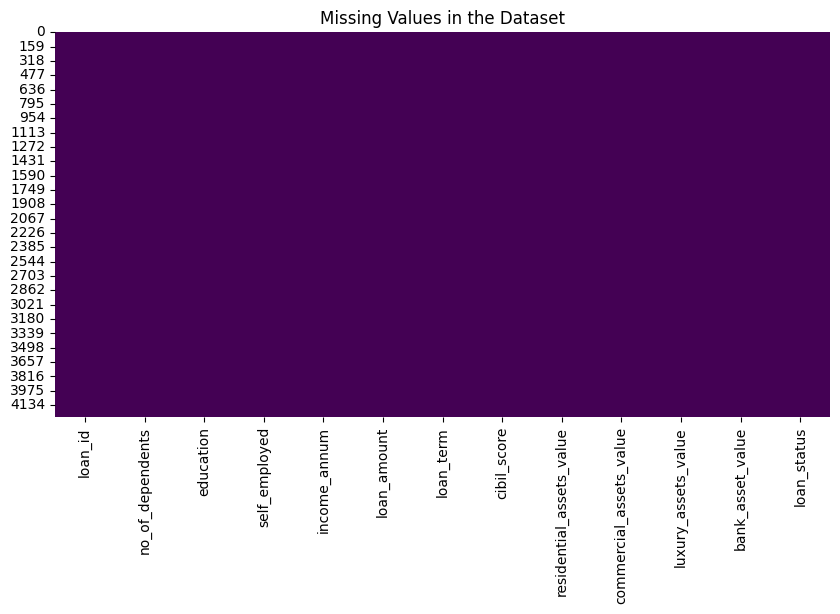


Duplicate Entries: 0
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


/var/folders/tk/lc1sb7050c35mhk5g04108ch0000gn/T/ipykernel_68288/992867607.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='coolwarm')


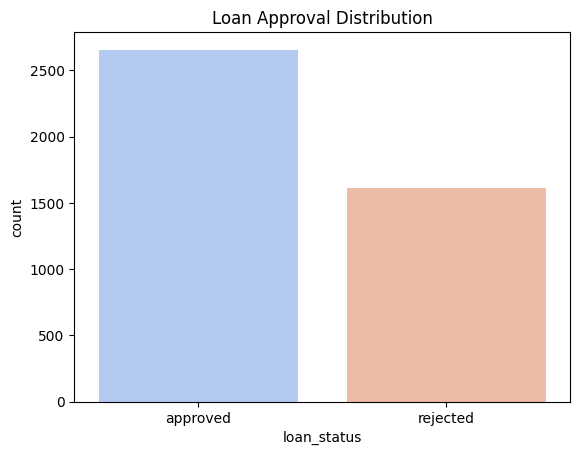

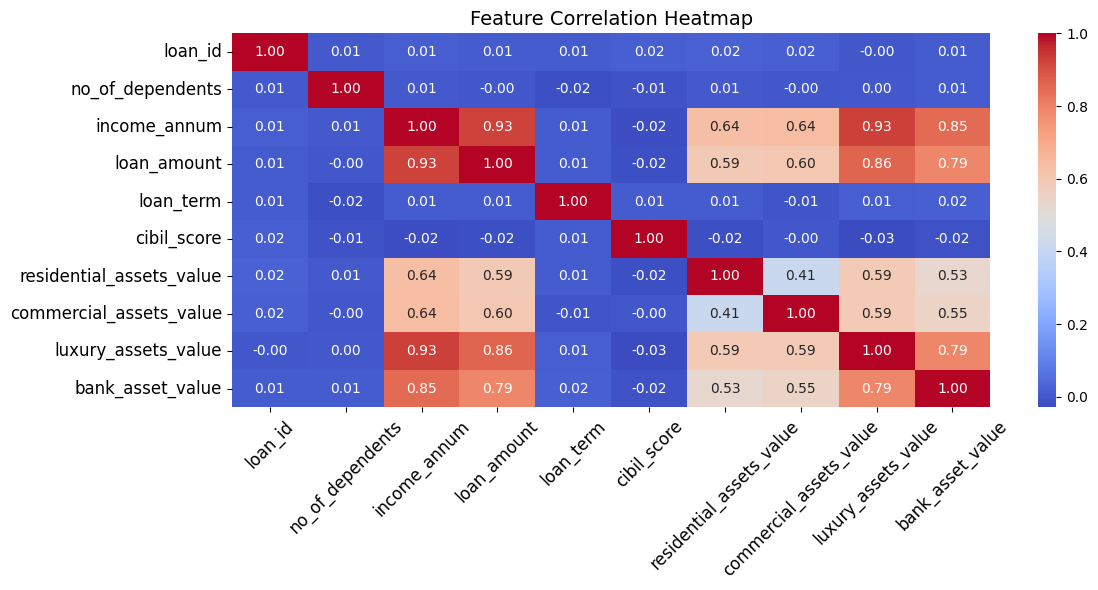

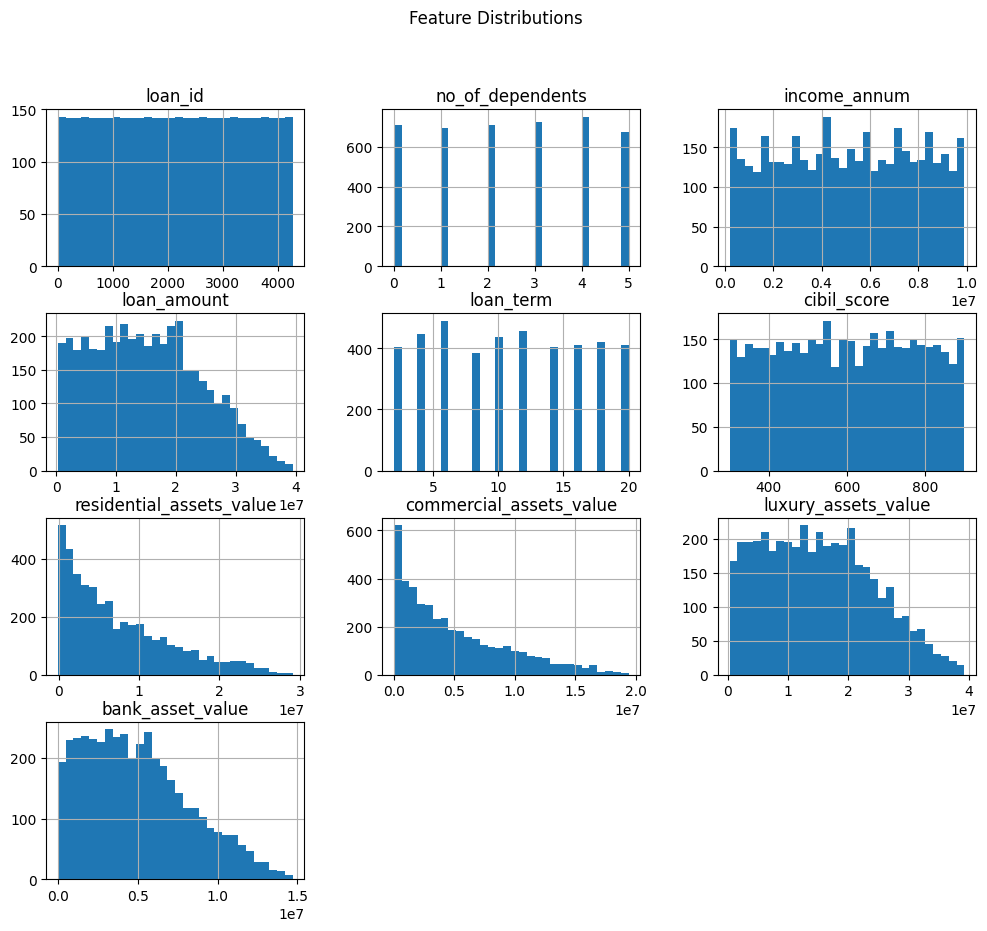

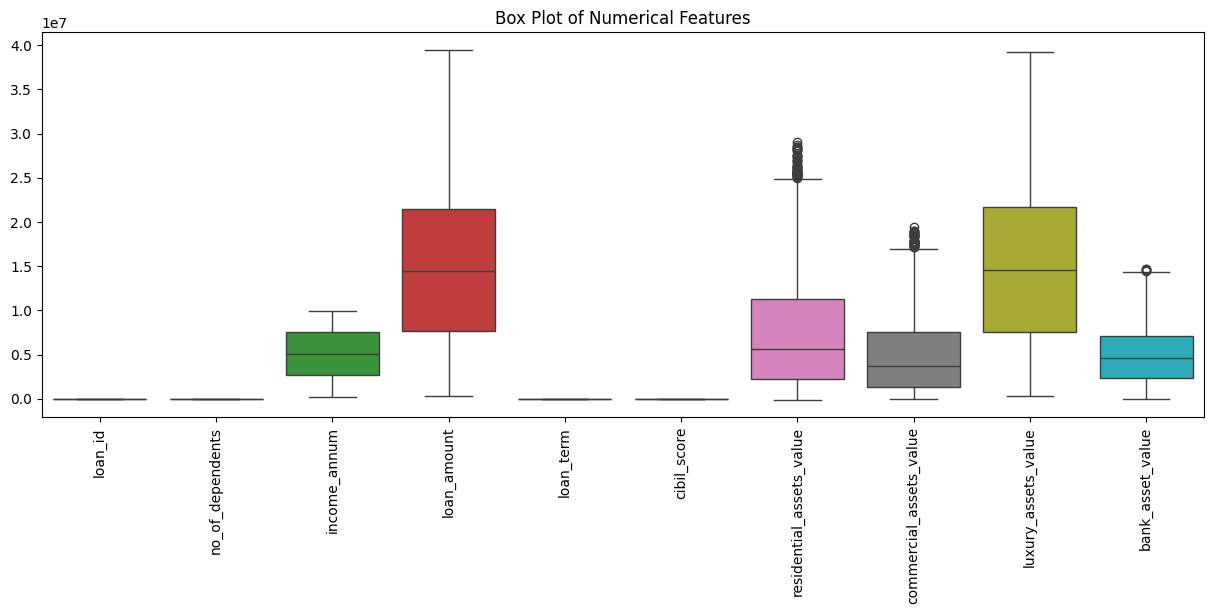

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
1,2,0,not graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,rejected
2,3,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,rejected
3,4,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,rejected
4,5,5,not graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,rejected


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_url = "https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset"

df = pd.read_csv("../1_Data/raw_loan_approval_dataset.csv")

print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary stats
print("\nSummary Statistics:")
print(df.describe())

df.columns = df.columns.str.strip().str.lower() 

# Cleaning categorical value names
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

print(df.columns) 

# missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

# duplicates
print("\nDuplicate Entries:", df.duplicated().sum())

print(df.columns)

# Distribution of Target Variable (Loan Status)
sns.countplot(x='loan_status', data=df, palette='coolwarm')
plt.title("Loan Approval Distribution")
plt.show()

# Correlation 
plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include='number')

heatmap = sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    xticklabels=True,
    yticklabels=True
)

plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12, rotation=0)   

plt.title("Feature Correlation Heatmap", fontsize=14)  
plt.tight_layout()  
plt.show()

# Histogram
df.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

# detect outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Output head
df.head()
